In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

import model
from dataset import PathDataset, RandomCutDataset ## cropped dataset
from utils import gen_bcelg2list, gen_bcelg2control, gen_bcelg2lists_ctrls

In [2]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))

hidden_channels_list = [16, 32, 64, 128, 256]
scale_list           = [(2, 1, 1)]
nblocks              = 2
s_nblocks            = 2
activation           = nn.ReLU()
dropout              = 0.5
partial              = (64, 192) ########################
JNet = model.JNet(hidden_channels_list  = hidden_channels_list ,
                  nblocks               = nblocks              ,
                  s_nblocks             = s_nblocks            ,
                  activation            = activation           ,
                  dropout               = dropout              ,
                  scale_list            = scale_list           ,
                  mu_z                  = 0.2                  ,
                  sig_z                 = 0.2                  ,
                  bet_xy                = 6.                   ,
                  bet_z                 = 35.                  ,
                  superres              = False                ,
                  )
JNet = JNet.to(device = device)
scale = 1
val_dataset   = RandomCutDataset(folderpath  =  'randomdata'     ,  ###
                                 imagename   =  '_x1'            ,
                                 labelname   =  '_label'         ,
                                 size        =  (768, 768, 768)  ,
                                 cropsize    =  (128, 128, 128)  ,
                                 I           =  200              ,
                                 low         =   16              ,
                                 high        =   20              ,
                                 scale       =    1              ,
                                 train       = False             ,
                                )
val_dataset256 = RandomCutDataset(folderpath  =  'randomdata'     ,  ###
                                  imagename   =  '_x1'            ,
                                  labelname   =  '_label'         ,
                                  size        =  (768, 768, 768)  ,
                                  cropsize    =  (256,  64,  64)  ,
                                  I           =  200              ,
                                  low         =   16              ,
                                  high        =   20              ,
                                  scale       =    1              ,
                                  train       = False             ,
                                 )


In [3]:
model_names = ['JNet_77_x1', 'JNet_81_x1_256', 'JNet_83_x1_partial', 'JNet_86_x1_partial']
val_datasets = [val_dataset, val_dataset256, val_dataset256, val_dataset]
partials = [None, None, (64, 192), (32, 96)]

In [4]:
bcess = gen_bcelg2lists_ctrls(JNet, model_names, val_datasets, device, partials)

In [16]:
arr = np.array(bcess[3])
c   = np.array([-100])
arr = np.setdiff1d(arr, c)
bces = arr.tolist()
bcess[3] = bces

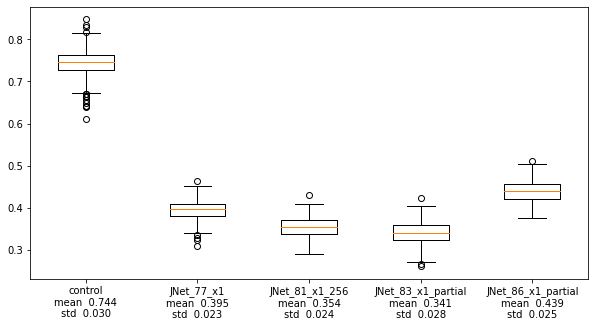

In [17]:
model_names = ['JNet_77_x1', 'JNet_81_x1_256', 'JNet_83_x1_partial', 'JNet_86_x1_partial']
model_names.insert(0, 'control')
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.boxplot((bcess))
ax.set_xticklabels([f"{model_names[i]}\nmean  {np.mean(bcess[i]):.3f}\nstd  {np.std(bcess[i]):.3f}"for i in range(len(bcess))])
fig.show()